In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# =============================================================================
#  Import Section: LOAD DATA
# =============================================================================

# Python lib/std-pkgs imports
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Data Imports
import load_data as ld
from rawDataHandler import RawDataHandler, NodeDfStore

# IPython Shell Flag
py_ipython_flag = True

In [3]:
# =============================================================================
#  Folder specs
# =============================================================================

# Paths to save the data
out_path= './data_preproc_log/dataset7-final/'
out_csv_path = out_path + 'wsize_runs.csv'
out_plot_path = out_path + 'wsize_mode-nseg_distrib.pdf'
out_pickle_path = out_path + 'wsize_run_casesDict.pkl'

# Source folder containing the 'scenarios' folder
# src_dir = "/home/daniel/Documents/00_DNA/DASH/data/scenarioTest/"
src_dir = "/home/shared_data/dash/dataset7_35Mbps_max_brate_withCa/"
case = 'scenarioTest'

# subfolders = [name for name in os.listdir(src_dir) if os.path.isdir(os.path.join(src_dir, name))]
# subfolders = ['run1', 'run2']
# subfolders = ['run' + str(i) for i in range(1,19, 3)]
subfolders = ['run' + str(i) for i in [1, 2, 6, 7, 12, 13, 21, 23, 27]]
print(subfolders)

['run1', 'run2', 'run6', 'run7', 'run12', 'run13', 'run21', 'run23', 'run27']


In [4]:
# w_sizes = [2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
w_sizes = [2.0, 4.0, 8.0, 16.0]

In [5]:
# Dict cases: stores the df_out for a wsize/run combination
cases_dict = dict()

# CSV to store averages over cases (one row corresp. averages across all nodes of one 'run'-wsize combination)
df_total = pd.DataFrame(columns=['wsize'])

# Loop over possible window sizes
for wsize in w_sizes:
    for run in subfolders:
        print("Computing for w_size ", wsize, "\tRun: ", run)
        # Specify paths
        src_path = src_dir + run + '/'
        dir_dash_log = src_path + "dash_client_log.txt"
        dir_DlMacStats = src_path + "DlMacStats.txt"
        dir_UlMacStats = src_path + "UlMacStats.txt"
        dir_DlRsrpSinrCellIdStats = src_path + "DlRsrpSinrStats.txt"
        dir_mobility = src_path + "mobility_trace.txt"
        dir_UlSinrStats = src_path + "UlSinrStats.txt"
        dir_MpegLog = src_path + "mpeg_player_log.txt"
        dir_ParamSettings = src_path + "parameter_settings.txt"

        # Create class instance for that run
        dataHandler = RawDataHandler(dir_DlMacStats, 
                                     dir_DlRsrpSinrCellIdStats,
                                     dir_mobility,
                                     dir_dash_log,
                                     dir_MpegLog,
                                     dir_ParamSettings,
                                     in_wsize_metricaggreg = 10.0,
                                     in_wsize_predhorizon = wsize,
                                     in_simTime=1000.0, verbose=False)

        # Run separated DfWindowSize of nodes
        df_out = dataHandler.get_dataframe_separated_wsize_analysis(verbose=False, time_end_threshold=1000.0)

        # Key to store cases info in dict
        cases_dict_key = str(wsize) + run 
        # Add to cases dict
        cases_dict[cases_dict_key] = df_out

        # Add to out csv of the current run evaluated
        total_dict = dict()
        cols = [elem for elem in df_out.columns if elem not in ['Node']]
        for elem in cols:
            total_dict[elem] = df_out[elem].mean()
        total_dict['run'] = run
        df_total = df_total.append(total_dict, ignore_index=True)

Computing for w_size  2.0 	Run:  run1
All values iterated! ... returning DataFrame...
Computing for w_size  2.0 	Run:  run2
All values iterated! ... returning DataFrame...
Computing for w_size  2.0 	Run:  run6
All values iterated! ... returning DataFrame...
Computing for w_size  2.0 	Run:  run7
All values iterated! ... returning DataFrame...
Computing for w_size  2.0 	Run:  run12
All values iterated! ... returning DataFrame...
Computing for w_size  2.0 	Run:  run13
All values iterated! ... returning DataFrame...
Computing for w_size  2.0 	Run:  run21
All values iterated! ... returning DataFrame...
Computing for w_size  2.0 	Run:  run23
All values iterated! ... returning DataFrame...
Computing for w_size  2.0 	Run:  run27
All values iterated! ... returning DataFrame...
Computing for w_size  4.0 	Run:  run1
All values iterated! ... returning DataFrame...
Computing for w_size  4.0 	Run:  run2
All values iterated! ... returning DataFrame...
Computing for w_size  4.0 	Run:  run6
All values 

In [ ]:
df_total

In [6]:
df_total = df_total.fillna(0.00).copy()

In [ ]:
df_total

In [7]:
mode_cols = [col for col in df_total.columns if col.startswith('mode')]
mode_cols.sort()
mode_cols.sort(key=len)
nseg_cols = [col for col in df_total.columns if col.startswith('nseg')]
nseg_cols.sort()
out_cols = ['wsize', 'run'] + ['cellId-Changes'] + nseg_cols + mode_cols

print(out_cols)

['wsize', 'run', 'cellId-Changes', 'nseg-0.0', 'nseg-1.0', 'nseg-10.0', 'nseg-2.0', 'nseg-3.0', 'nseg-4.0', 'nseg-5.0', 'nseg-6.0', 'nseg-7.0', 'nseg-8.0', 'nseg-9.0', 'mode-1000000.0', 'mode-2500000.0', 'mode-5000000.0', 'mode-8000000.0', 'mode-16000000.0', 'mode-35000000.0']


In [8]:
df_total = df_total[out_cols].copy()

In [10]:
df_total

,wsize,run,cellId-Changes,nseg-0.0,nseg-1.0,nseg-10.0,nseg-2.0,nseg-3.0,nseg-4.0,nseg-5.0,nseg-6.0,nseg-7.0,nseg-8.0,nseg-9.0,mode-1000000.0,mode-2500000.0,mode-5000000.0,mode-8000000.0,mode-16000000.0,mode-35000000.0
0,2.0,run1,5.851852,76.888280,21.741246,0.000000,1.320589,0.049885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.142325,4.855945,8.727628,20.777455,35.050172,27.446474
1,2.0,run2,6.481481,77.495492,21.063894,0.000000,1.410139,0.030474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.410387,7.684965,10.051143,20.731720,35.744597,22.377188
2,2.0,run6,5.962963,77.593166,21.002105,0.000000,1.343743,0.060986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.426721,4.260925,8.048527,20.748382,39.380990,25.134455
3,2.0,run7,6.707317,77.700899,21.014842,0.000000,1.235710,0.048550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.768051,9.557038,11.289082,23.678808,35.315832,14.391190
4,2.0,run12,7.439024,77.344812,21.269631,0.000000,1.340821,0.044737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.661706,9.902088,13.440465,27.024780,32.617946,10.353016
5,2.0,run13,6.500000,77.444609,21.495027,0.000000,1.040414,0.019950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.556945,16.858001,17.608600,28.460240,21.145192,4.371021
6,2.0,run21,6.703704,77.528827,20.855728,0.000000,1.562734,0.052711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.262942,5.364563,8.234622,21.069222,35.972352,25.096300
7,2.0,run23,6.682927,77.103457,21.587513,0.000000,1.287014,0.022017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.051755,9.997008,11.950438,27.746235,32.854989,11.399576
8,2.0,run27,6.426829,76.274770,22.641679,0.000000,1.063439,0.020112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.498695,19.374677,19.942923,29.604077,16.050570,2.529057
9,4.0,run1,5.851852,59.366850,33.992870,0.000000,5.114094,1.426083,0.100103,0.000000,0.000000,0.000000,0.000000,0.000000,2.566716,3.510994,6.711473,18.473809,37.756265,30.980743


In [11]:
pd_wsize_run = df_total.groupby('wsize', as_index=False).mean()

In [14]:
pd_wsize_run

,wsize,cellId-Changes,nseg-0.0,nseg-1.0,nseg-10.0,nseg-2.0,nseg-3.0,nseg-4.0,nseg-5.0,nseg-6.0,nseg-7.0,nseg-8.0,nseg-9.0,mode-1000000.0,mode-2500000.0,mode-5000000.0,mode-8000000.0,mode-16000000.0,mode-35000000.0
0,2.0,6.528455,77.263812,21.407963,0.000000,1.289400,0.038825,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,6.197725,9.761690,12.143714,24.426769,31.570293,15.899808
1,4.0,6.538041,59.961652,33.747442,0.000000,4.697343,1.466329,0.125569,0.001666,0.000000,0.000000,0.00000,0.000000,5.116928,7.801511,10.636497,23.648043,34.657551,18.139469
2,8.0,6.553046,38.078201,41.252843,0.000000,12.902775,4.126010,2.383887,0.997022,0.234218,0.025044,0.00000,0.000000,4.633520,6.689290,9.450071,21.906473,34.481722,22.838924
3,16.0,6.541827,24.329750,19.961073,0.018429,28.220675,14.837772,5.102889,2.961260,2.283548,1.435894,0.69526,0.153449,5.163184,6.750618,9.094656,21.342414,31.985578,25.663550


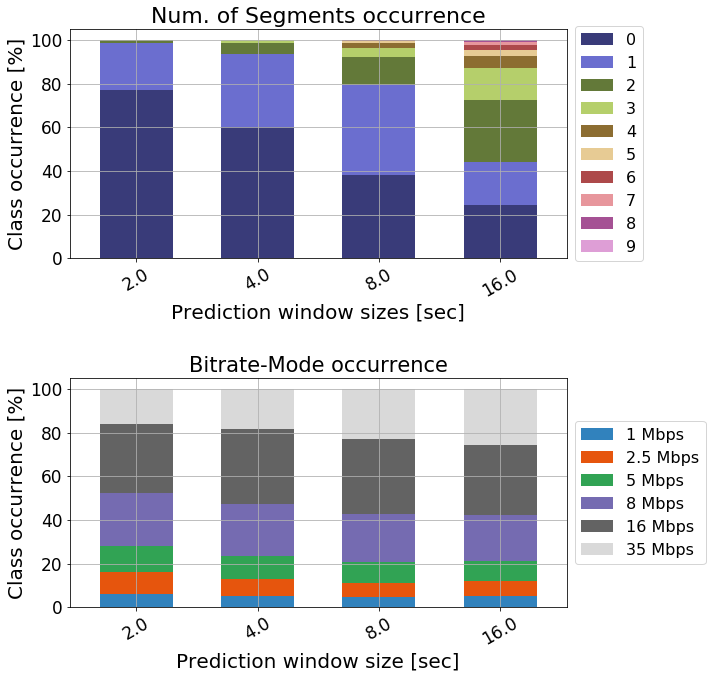

In [16]:
pd_wsize_plt = pd_wsize_run.rename(columns={'nseg-0.0': '0',
                                            'nseg-1.0': '1',
                                           'nseg-2.0': '2',
                                           'nseg-3.0': '3',
                                            'nseg-4.0': '4',
                                            'nseg-5.0': '5',
                                            'nseg-6.0': '6',
                                            'nseg-7.0': '7',
                                            'nseg-8.0': '8',
                                            'nseg-9.0': '9',
                                           'mode-1000000.0' : '1 Mbps',
                                           'mode-2500000.0' : '2.5 Mbps',
                                           'mode-5000000.0' : '5 Mbps',
                                           'mode-8000000.0' : '8 Mbps',
                                           'mode-16000000.0' : '16 Mbps',
                                           'mode-35000000.0' : '35 Mbps'}).copy()
pd_wsize_plt = pd_wsize_plt.set_index('wsize').copy()
nseg_cols = ['0','1', '2','3', '4', '5', '6', '7', '8', '9']
mode_cols = ['1 Mbps','2.5 Mbps','5 Mbps','8 Mbps','16 Mbps','35 Mbps']

fig, axes = plt.subplots(nrows=2, ncols=1)
font=20
fsize = (10, 10)
# Plor the n-segments
pd_wsize_plt[nseg_cols].plot(kind='bar', grid=True,
                            colormap='tab20b',
                            stacked=True,
                             width=0.6,
                             fontsize=font-3,
                            ax=axes[0],
                            figsize=fsize
                            )
axes[0].set_title('Num. of Segments occurrence', fontsize=font+2)
axes[0].set_xlabel('Prediction window sizes [sec]', fontsize=font)
axes[0].set_ylabel('Class occurrence [%]', fontsize=font)
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=font-4)
axes[0].tick_params(axis='x', labelrotation=30 )

# Plor the mode-segments
pd_wsize_plt[mode_cols].plot(kind='bar', grid=True,
                            colormap='tab20c',
                            stacked=True,
                             width=0.6,
                             fontsize=font-3,
                            ax=axes[1],
                            figsize=fsize
                            )
axes[1].set_title('Bitrate-Mode occurrence', fontsize=font+1)
axes[1].set_xlabel('Prediction window size [sec]', fontsize=font)
axes[1].set_ylabel('Class occurrence [%]', fontsize=font)
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=font-4)
axes[1].tick_params(axis='x', labelrotation=30)

# fig.subplots_adjust(wspace=6)
fig.tight_layout(pad=10.0)
fig.tight_layout()

In [ ]:
fig, axes = plt.subplots(nrows=len(subfolders), ncols=2, figsize=(30, 20))
myfigsize=(30,10)
for i in range(0, len(subfolders)):
    print(i)
    runfolder = subfolders[i]
    print(runfolder)
    df_plot = df_total[df_total['run'] == runfolder].set_index('wsize')
    
    df_plot[mode_cols].plot(kind='bar', grid=True,
                            title='MODE of req seg distribution: across nodes for variable wsize',
                            # xlabel = 'Percentage',
                            #yticks=np.arange(0, 100, 10),
                            #colormap='tab20c',
                            stacked=True,
                            #figsize=myfigsize,
                            ax=axes[i,0]
                            )

    df_plot[nseg_cols].plot(kind='bar', grid=True,
                            title='NUMBER of req seg: distribution across nodes for variable wsize ',
                            stacked=True,
                            # xlabel = 'Percentage'
                            #yticks=np.arange(0, 100, 10),
                            #colormap='tab20c',
                            #figsize=myfigsize,
                            ax=axes[i,1]
                            )
    axes[i,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i,0].legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [17]:
# SAVE STUFF

# dict
with open(out_pickle_path, 'wb') as file:
    pickle.dump(cases_dict, file, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
# csv
df_total.to_csv(out_csv_path, index=False)

In [19]:
# plot
fig.savefig(out_plot_path)